<a href="https://colab.research.google.com/github/Bino-01/Air-Line-Passengers/blob/master/ARIMA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Graphical Visualisation
import seaborn as sns           # Statistical Visualisation

In [24]:
# Reading the dataset
df = pd.read_csv('/content/AirPassengers.csv')
df.head()
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [25]:
"""df.shape
df.describe
df.describe()
df.info
df.info() """
df.iloc[2:27:3]
df.loc[1:4]

,Month,#Passengers
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [26]:
# Changing Columns Name
df.columns = ['Month', 'Passengers']
df.tail(10)

,Month,Passengers
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [27]:
# Setting Month as Index
df['Month']= pd.to_datetime(df['Month'], infer_datetime_format= True)
df = df.set_index('Month')
df.head()


/tmp/ipython-input-3776499773.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month']= pd.to_datetime(df['Month'], infer_datetime_format= True)


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


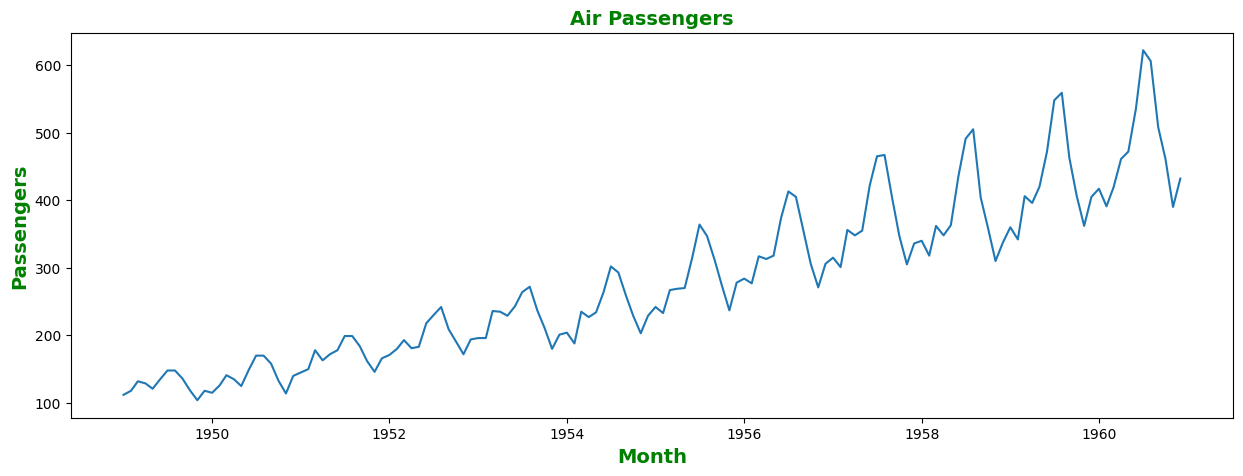

In [28]:
# Plotting the TS Dataset
plt.style.available
#plt.style.use = 'seaborn-v0_8'
plt.style.use= 'ggplot'
plt.figure(figsize=(15,5), dpi = 100)
plt.xlabel('Month', color='green', fontdict={'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.ylabel('Passengers', color='green', fontdict={'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.title('Air Passengers', color='green', fontdict={'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.plot(df)
plt.show()

In [29]:
# Splitting the Dataset between Training and Testing Sets
train = df.loc[df.index < '1960-01-01']
test = df.loc[df.index >= '1960-01-01']

In [30]:
# Using the window shift to use the whole dataset as train and test set
y_hat_MA = test.copy()
window = 12
y_hat_MA['moving_avg_forecast'] = train['Passengers'].rolling(window).mean().iloc[-1]

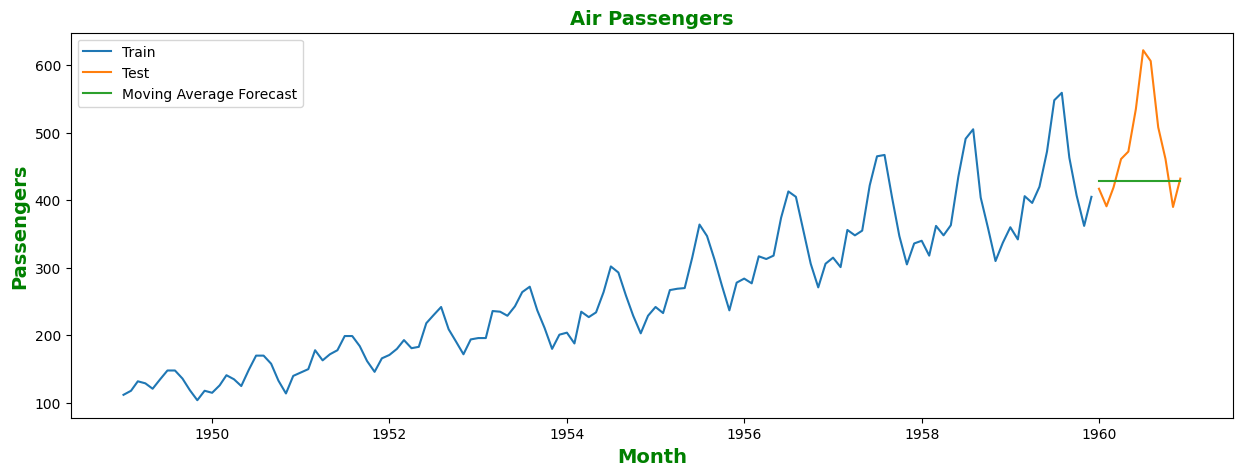

In [31]:
# Plotting the Moving Average Forecasting
plt.figure(figsize=(15,5), dpi = 100)
plt.xlabel('Month', color='green', fontdict={'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.ylabel('Passengers', color='green', fontdict={'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.title('Air Passengers', color='green', fontdict={'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_MA['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [32]:
# Accuracy Metrics
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_MA['moving_avg_forecast'])).round(2)
mape= np.round(np.mean(np.abs(test['Passengers'] - y_hat_MA['moving_avg_forecast'])/(test['Passengers']))*100,2)
mae = np.round(np.mean(np.abs(test['Passengers'] - y_hat_MA['moving_avg_forecast'])),2)

In [33]:
# Printing the Accuracy Metrics Results
results = pd.DataFrame({'Method':['Method'], 'RMSE':[rmse], 'MAPE':[mape], 'MAE':[mae]})
results = results[['Method', 'RMSE', 'MAPE', 'MAE']]
results


,Method,RMSE,MAPE,MAE
0,Method,88.47,12.06,63.89


In [35]:
# Verification of Non-Stationarity
"""
1- Visual test showing that the time serie is non-stationary (no constant mean, no constant variance, no )
2- Augmented Dickey-Fuller test (ADF), rejecting the null for stationarity. p > 0.05 ===> non-stationarity.
3- Kwiatkowski–Phillips–Schmidt–Shin test (KPSS); KPSS p-value < 0.05 ===> non-stationarity.
NB: Slow decay in ACF == Non-stationary time series; but rapid decay in PACF == Stationary time series.
NB: If Trend is visible, the Variance is increasing, ADF p-value > 0.05 and KPSS p-value < 0.05 ===> non-stationarity.
Therefore proceed with differencing to make the time series stationary = 1st order differencing (make TS stationary) - == proceed with ARIMA model.
"""
"""
NB: Always start with simple Candidate Models
ARIMA(1, d, 0)
ARIMA(0, d, 1)
ARIMA(1, d, 1)
ARIMA(2, d, 1)
ARIMA(1, d, 2)

NB: Never with p or q > 3 without strong justification
"""

from statsmodels.tsa.stattools import adfuller, kpss

adf_result = adfuller(df)
print("ADF p-value:", adf_result[1])

kpss_result = kpss(df, regression='c')
print("KPSS p-value:", kpss_result[1])

# The result shows that ADF > 0.05 and KPSS < 0.01 therefore the time series is non-stationary

ADF p-value: 0.991880243437641
KPSS p-value: 0.01


/tmp/ipython-input-401296928.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df, regression='c')


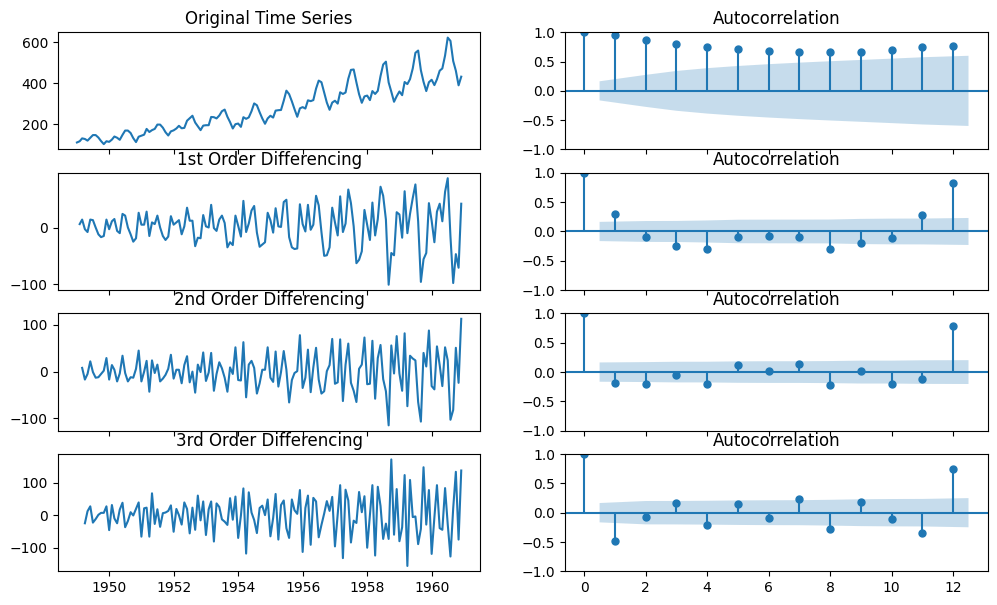

In [37]:
# Let's start by implementing 1st, 2nd, 3rd order differencing
# Let's Determine the value of d by differencing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams['figure.figsize'] = 12,7

# 1- Original Time Series
fig, axes = plt.subplots(4,2, sharex = 'col')
axes[0,0].plot(df['Passengers']) ; axes[0,0].set_title('Original Time Series')
plot_acf(df['Passengers'], lags = 12, ax = axes[0,1])

# NB Rapid decaying of ACF showing/confirming stationarity. Therefore, we will use only 1st order differencing and D=1

# 2- 1st Order Differencing
axes[1,0].plot(df['Passengers'].diff()); axes[1,0].set_title('1st Order Differencing')
plot_acf(df['Passengers'].diff().dropna(), lags = 12, ax = axes[1,1])


# 3- 2bnd Order Differencing
axes[2,0].plot(df['Passengers'].diff().diff()); axes[2,0].set_title('2nd Order Differencing')
plot_acf(df['Passengers'].diff().diff().dropna(), lags = 12, ax = axes[2,1])

#4- 3rd Order Differencing
axes[3,0].plot(df['Passengers'].diff().diff().diff()); axes[3,0].set_title('3rd Order Differencing')
plot_acf(df['Passengers'].diff().diff().diff().dropna()  , lags = 12, ax = axes[3,1])

plt.show()

<Figure size 2250x750 with 0 Axes>

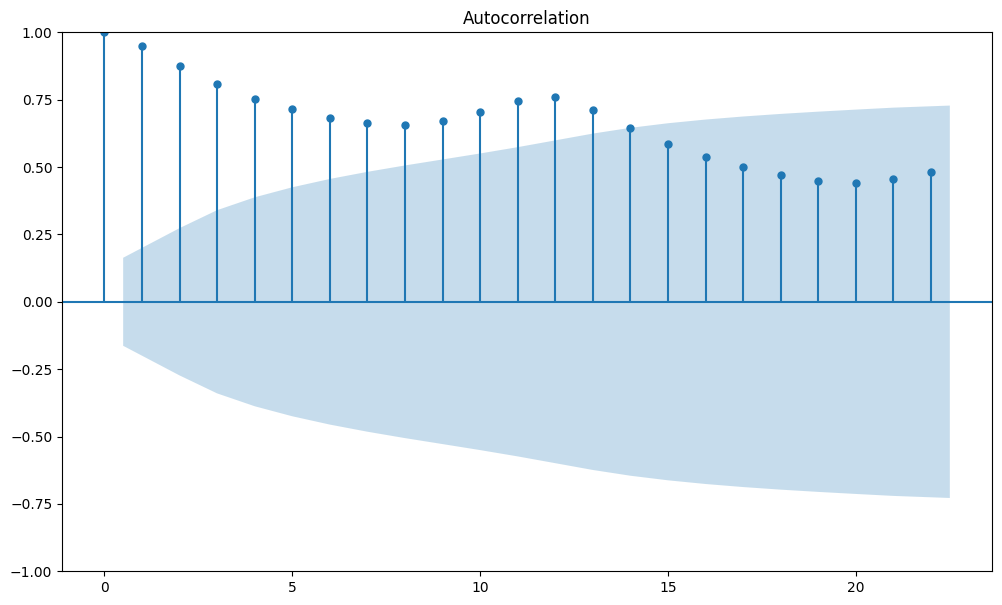

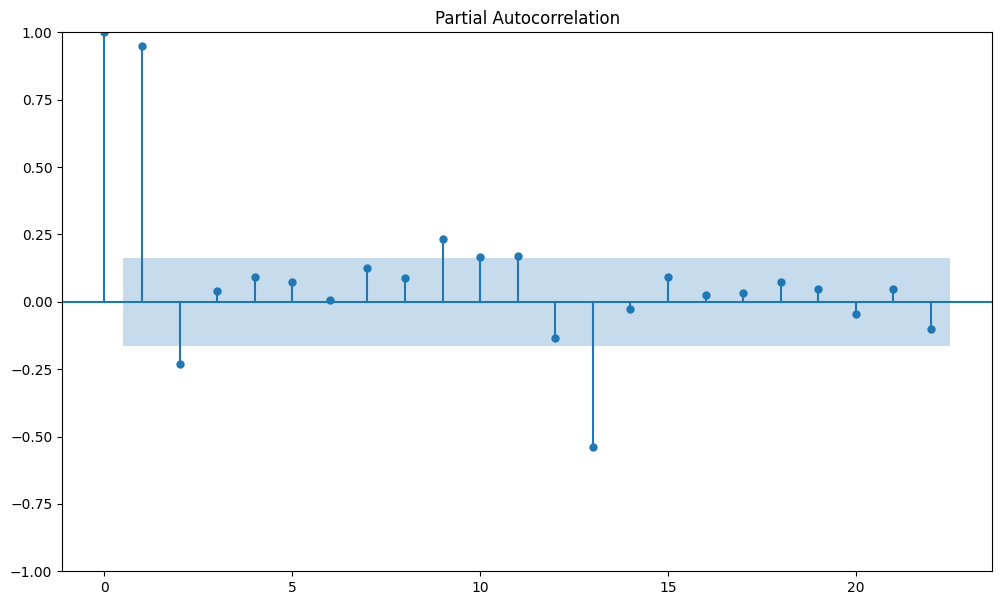

'\n1- ACF:The Autocorrelation Function (ACF) measures the correlation between a time series and its own lagged values.\nFormally:\nACF at lag k = correlation between  X(t)\u200b and X(t−k)\u200b\nIn Short we are answering to the question- How much does the curent value resemble its past values? \nLag1 ===> Correlation between today and yesterday values. \nLag12 ===> Correlation between this year Jan. and last year Jan. values.\nNB: ACF captures [Overall persistence - short term vs long term memory - Seasonality - Moving average behaviour = MA(q)]\n\n2- PACF: The Partial Autocorrelation Function (PACF) measures the direct correlation between a time series and a lagged version of itself, \nafter removing the influence of all intermediate lags.\nFormally \nPACF at lag k = correlation between X(t)\u200b and X(t−k)\u200b, controlling for lags 1 to k−1\nIn short, it answers to the question: “Does a lag at time k still matter once earlier lags are accounted for?”\ne.g., If PACF at lag 3 is si

In [38]:
# Plotting the Autocorrelation and Partial Auto-correlation functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize = (15,5), dpi = 150)
plot_acf(df['Passengers']), plot_pacf(df['Passengers'])
plt.show()

"""
1- ACF:The Autocorrelation Function (ACF) measures the correlation between a time series and its own lagged values.
Formally:
ACF at lag k = correlation between  X(t)​ and X(t−k)​
In Short we are answering to the question- How much does the curent value resemble its past values?
Lag1 ===> Correlation between today and yesterday values.
Lag12 ===> Correlation between this year Jan. and last year Jan. values.
NB: ACF captures [Overall persistence - short term vs long term memory - Seasonality - Moving average behaviour = MA(q)]

2- PACF: The Partial Autocorrelation Function (PACF) measures the direct correlation between a time series and a lagged version of itself,
after removing the influence of all intermediate lags.
Formally
PACF at lag k = correlation between X(t)​ and X(t−k)​, controlling for lags 1 to k−1
In short, it answers to the question: “Does a lag at time k still matter once earlier lags are accounted for?”
e.g., If PACF at lag 3 is significant:
→ lag 4 provides new information not explained by lags 1, 2, and 3.

3- Positive and Negative significant Lags: First Principle (Very Important)
Positive and negative significant lags are both valid information.
They do not cancel each other out and do not require different actions.

Positive lag → persistence (values tend to follow the same direction)
Negative lag → oscillation / reversal (high followed by low, etc.)

What matters is where the significance stops and how it decays, not the sign
"""



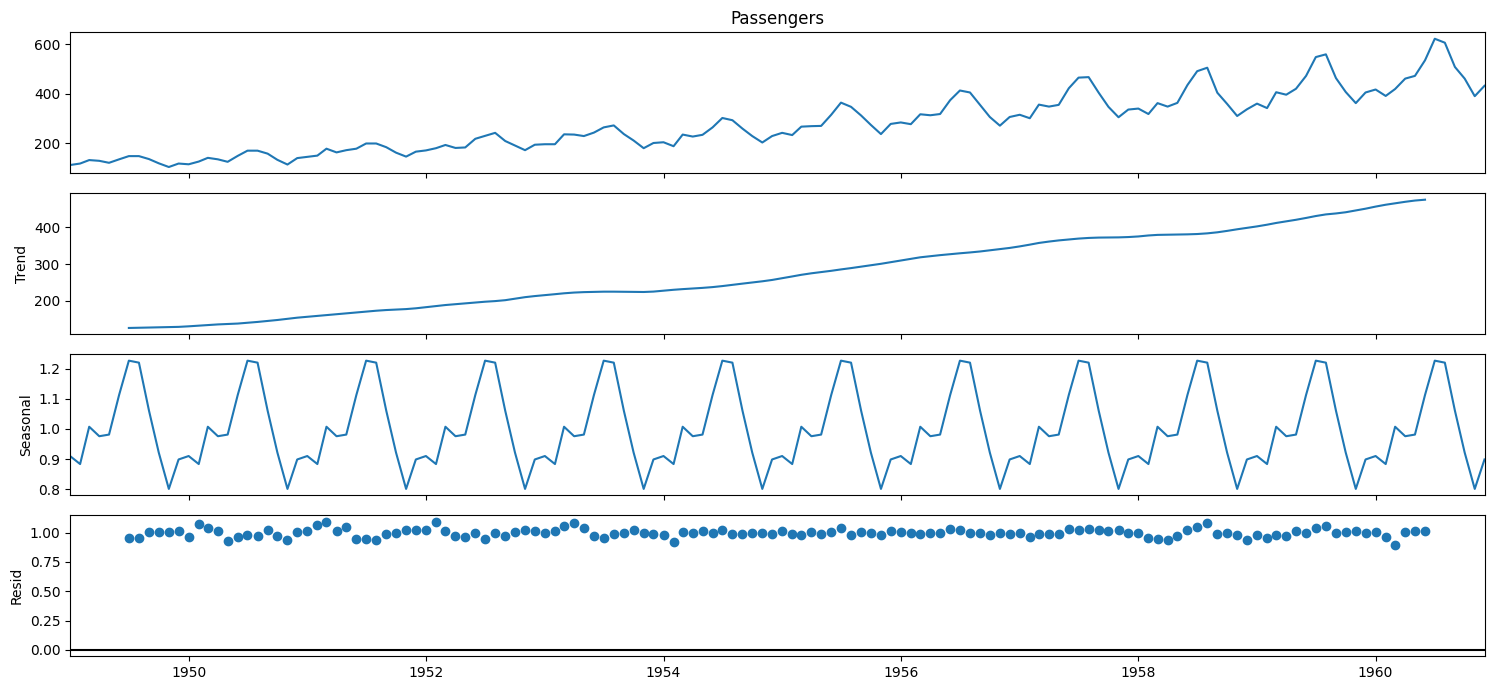

In [39]:
# Performing Time Series decomposition
plt.rcParams.update({'figure.figsize':(15,7)})
#plt.figure (figsize = (15,5), dpi = 150)
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Passengers'], model='multiplicative')
decompose.plot()
plt.show()
# We can select or start selecting q = 1,...12, because more than 12 lags are significant
# We can also select p = 1, 2. because there are 2

In [ ]:
# How to select p and q.
"""
NB: If Trend is visible, the Variance is increasing, ADF p-value > 0.05 and KPSS p-value < 0.05 ===> non-stationarity.
Therefore proceed with differencing to make the time series stationary = 1st order differencing (make TS stationary) - == proceed with ARIMA model.

NB: Always start with simple Candidate Models
ARIMA(1, d, 0)
ARIMA(0, d, 1)
ARIMA(1, d, 1)
ARIMA(2, d, 1)
ARIMA(1, d, 2)

NB: Never with p or q > 3 without strong justification
"""

from statsmodels.tsa.stattools import adfuller, kpss

adf_result = adfuller(df)
print("ADF p-value:", adf_result[1])

kpss_result = kpss(df, regression='c')
print("KPSS p-value:", kpss_result[1])

# The result shows that ADF > 0.05 and KPSS < 0.01 therefore the time series is non-stationary

ADF p-value: 0.991880243437641
KPSS p-value: 0.01


/tmp/ipython-input-401296928.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df, regression='c')


In [45]:
# Applying ARIMA Model (1,1,0); then (0,1,1); then (1,1,1)
"""
AIC (Akaike Information Criterion)
AIC=−2log⁡(L)+2k\text{AIC} = -2\log(L) + 2kAIC=−2log(L)+2k
BIC (Bayesian Information Criterion)
BIC=−2log⁡(L)+klog⁡(n)\text{BIC} = -2\log(L) + k\log(n)BIC=−2log(L)+klog(n)
Where:

L = likelihood
k = number of parameters
n = sample size

Lower AIC/BIC are better for model selection

"""
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Passengers'], order = (1,1,0))
model_fit = model.fit()
model_fit.summary()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -631.365
Date:                Wed, 07 Jan 2026   AIC                           1266.731
Time:                        01:52:46   BIC                           1272.481
Sample:                    01-01-1949   HQIC                          1269.068
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2912      0.090      3.236      0.001       0.115       0.468
sigma2       898.3992     91.552      9.813      0.000     718.961    1077.838
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                 6.92
Prob(Q):                              0.47   Prob(JB):                         0.03
Heteroskedasticity (H):               7.36   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
# 2nd model
model = ARIMA(train['Passengers'], order = (0,1,1))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -629.598
Date:                Wed, 07 Jan 2026   AIC                           1263.195
Time:                        01:57:27   BIC                           1268.945
Sample:                    01-01-1949   HQIC                          1265.532
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3730      0.089      4.208      0.000       0.199       0.547
sigma2       873.9665     94.243      9.274      0.000     689.254    1058.679
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 3.60
Prob(Q):                              0.83   Prob(JB):                         0.17
Heteroskedasticity (H):               7.26   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
#3rd model
model = ARIMA(train['Passengers'], order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -625.518
Date:                Wed, 07 Jan 2026   AIC                           1257.035
Time:                        02:10:16   BIC                           1265.661
Sample:                    01-01-1949   HQIC                          1260.540
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5436      0.100     -5.443      0.000      -0.739      -0.348
ma.L1          0.9272      0.051     18.336      0.000       0.828       1.026
sigma2       816.5398     95.147      8.582      0.000     630.056    1003.024
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 2.51
Prob(Q):                              0.57   Prob(JB):                         0.29
Heteroskedasticity (H):               6.76   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
# 4th model
model = ARIMA(train['Passengers'], order = (2,1,1))
model_fit = model.fit()
model_fit.summary() # The ARIMA (2,1,1) is the best ARIMA model because of low values of AIC and BIC

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -619.131
Date:                Wed, 07 Jan 2026   AIC                           1246.262
Time:                        02:03:42   BIC                           1257.763
Sample:                    01-01-1949   HQIC                          1250.936
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0698      0.094     11.323      0.000       0.885       1.255
ar.L2         -0.4734      0.101     -4.670      0.000      -0.672      -0.275
ma.L1         -0.8402      0.085     -9.851      0.000      -1.007      -0.673
sigma2       741.2092     92.892      7.979      0.000     559.145     923.274
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                 1.71
Prob(Q):                              0.33   Prob(JB):                         0.42
Heteroskedasticity (H):               6.69   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
# 5th model
model = ARIMA(train['Passengers'], order = (1,1,2))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -622.487
Date:                Wed, 07 Jan 2026   AIC                           1252.974
Time:                        02:04:37   BIC                           1264.474
Sample:                    01-01-1949   HQIC                          1257.647
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5673      0.105      5.382      0.000       0.361       0.774
ma.L1         -0.3351      0.105     -3.198      0.001      -0.540      -0.130
ma.L2         -0.4825      0.074     -6.529      0.000      -0.627      -0.338
sigma2       781.3644     96.191      8.123      0.000     592.834     969.894
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.80   Prob(JB):                         0.96
Heteroskedasticity (H):               7.09   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
# 6th model
model = ARIMA(train['Passengers'], order = (1,1,3))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -622.029
Date:                Wed, 07 Jan 2026   AIC                           1254.058
Time:                        02:07:44   BIC                           1268.434
Sample:                    01-01-1949   HQIC                          1259.899
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5043      0.195      2.589      0.010       0.122       0.886
ma.L1         -0.3088      0.211     -1.461      0.144      -0.723       0.105
ma.L2         -0.3275      0.088     -3.715      0.000      -0.500      -0.155
ma.L3         -0.1562      0.095     -1.652      0.099      -0.342       0.029
sigma2       776.3885     98.319      7.897      0.000     583.688     969.089
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.96
Prob(Q):                              0.87   Prob(JB):                         0.62
Heteroskedasticity (H):               6.98   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""